# CENG313 Introduction to Data Science
## Assignment #1 - Exploring and Visualizing Data in Python
## Due: November 30 by 11:59pm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading Data

In [ ]:
# import required libraries for data visualization and analysis
import pandas as pd
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
# Load data from file "adult.csv" as dataframe
dataset=pd.read_csv('/content/drive/MyDrive/assignment1/adult.csv')

#### Exploring Data Structure

In [ ]:
# Show summary of records. Print names of columns and their datatypes
dataframe=pd.DataFrame(dataset)
print(dataframe.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [ ]:
# Check your data looking with first 5 rows of table. Print the size of data
print(dataframe.size)
dataset.head()

732630


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Exploring Data Statictically

In [ ]:
# Get statistical summary of data
dataframe.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Find mean values of the first 10 records in dataframe
mean_values = dataframe.head(10).mean()
print(mean_values)

age                    35.8
fnlwgt             192239.5
educational-num         9.2
capital-gain         1079.1
capital-loss            0.0
hours-per-week         35.2
dtype: float64


<ipython-input-44-1bb94cec6610>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = dataframe.head(10).mean()


#### Filtering Data

In [ ]:
# Get records whose "age" is greater and equal than 25
filtered_dataframe = dataframe[dataframe.age >= 25]
#filtered_dataframe = dataframe[dataframe['age'] >= 25]
#filtered_dataframe = dataframe.query('age>=25')
print(filtered_dataframe)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48835   53       Private  321865       Masters               14   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

In [ ]:
# Obtain a subspace of data with "Age","Gender" and "income" features
subspace_dataframe = dataframe[['age', 'gender', 'income']]
print(subspace_dataframe)

       age  gender income
0       25    Male  <=50K
1       38    Male  <=50K
2       28    Male   >50K
3       44    Male   >50K
4       18  Female  <=50K
...    ...     ...    ...
48837   27  Female  <=50K
48838   40    Male   >50K
48839   58  Female  <=50K
48840   22    Male  <=50K
48841   52  Female   >50K

[48842 rows x 3 columns]


#### Data Cleaning

In [ ]:
# Check duplicate records
#duplicate_records = dataframe[dataframe.duplicated()]
#print(duplicate_records)
dataframe= dataframe.drop_duplicates()
print(dataframe)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [ ]:
# Convert categorical "martial-status" data to binary attibutes

# If we want to convert martial-status to numeric attribute
#label_encoder = LabelEncoder()
#dataframe['marital-status'] = label_encoder.fit_transform(dataframe['marital-status'])
#print(dataframe)

# If we want to convert martial-status to binary attribute
dataframe = pd.get_dummies(dataframe, columns=['marital-status'], prefix='marital_status')

print(binary_martial_status_dataframe)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

              occupation relationship   race  gender  capital-gain  ...  \
0      Machine-op-inspct    Own-child  Black    Male             0  ...   
1        Farming-fishing      Husband  White 

In [ ]:
# Check missing values in your data

# Replace '?' with NaN
dataframe.replace('?', pd.NA, inplace=True)
print(dataframe.isnull().sum())

age                                     0
workclass                               0
fnlwgt                                  0
education                               0
educational-num                         0
occupation                              0
relationship                            0
race                                    0
gender                                  0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
income                                  0
marital_status_Divorced                 0
marital_status_Married-AF-spouse        0
marital_status_Married-civ-spouse       0
marital_status_Married-spouse-absent    0
marital_status_Never-married            0
marital_status_Separated                0
marital_status_Widowed                  0
dtype: int64


In [ ]:
# Obtain a subset of data with nonmising values
nonmising_dataframe = dataframe.dropna()

print(nonmising_dataframe)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       Private  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

              occupation relationship   race  gender  capital-gain  ...  \
0      Machine-op-inspct    Own-child  Black    Male             0  ...   
1        Farming-fishing      Husband  White 

In [ ]:
# Fill missing values using any technique (mentioned in the lecture) according to data type


# Function to fill missing values based on data type
# But in this dataset we have only missing categorical data not numeric data
def fill_missing_values(column):
    if is_numeric_dtype(column):
        return column.fillna(column.mean()) # Filling with the mean value for numeric columns
    else:
        return column.fillna(column.mode()[0])  # Filling with the most frequent value for categorical columns

# Apply each column in  dataframe
dataframe = dataframe.apply(fill_missing_values)
print(dataframe)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       Private  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

              occupation relationship   race  gender  capital-gain  ...  \
0      Machine-op-inspct    Own-child  Black    Male             0  ...   
1        Farming-fishing      Husband  White 

#### Visualizing Data

1.Univariate analysis

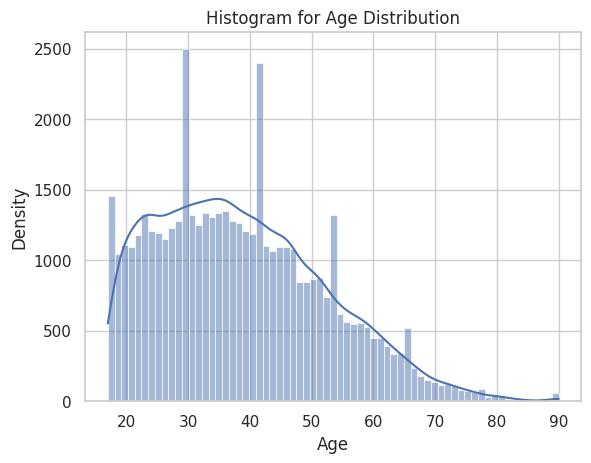

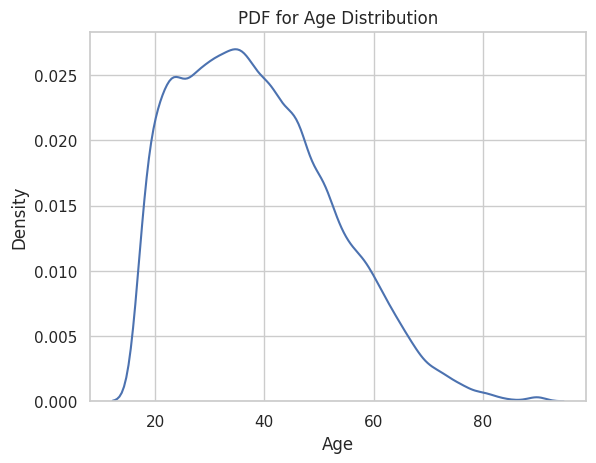

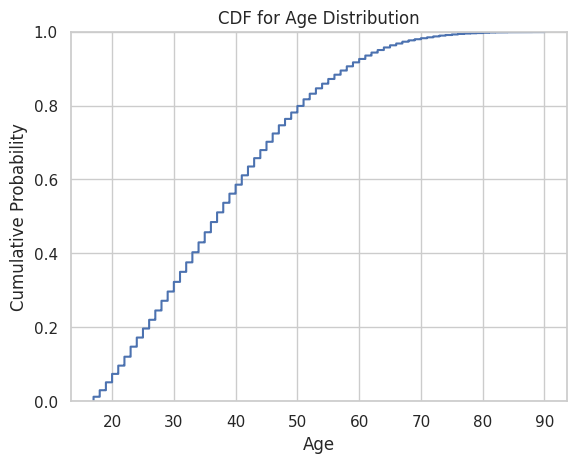

In [ ]:
# "Age" distibution using histogram, pdf and cdf (using matplotlib  and seaborn)

# using histogram
sns.histplot(dataframe["age"], kde=True)
plt.title("Histogram for Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# using pdf
sns.kdeplot(dataframe["age"])
plt.title("PDF for Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

#using cdf
sns.ecdfplot(dataframe["age"])
plt.title("CDF for Age Distribution")
plt.xlabel("Age")
plt.ylabel("Cumulative Probability")
plt.show()

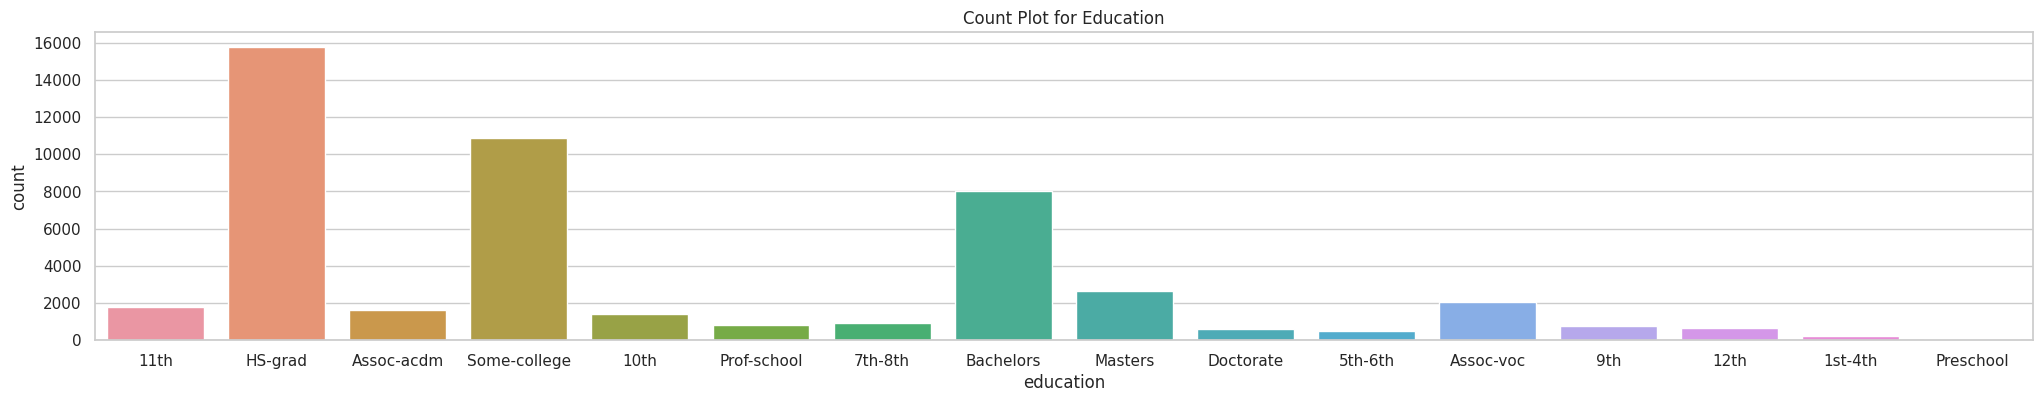

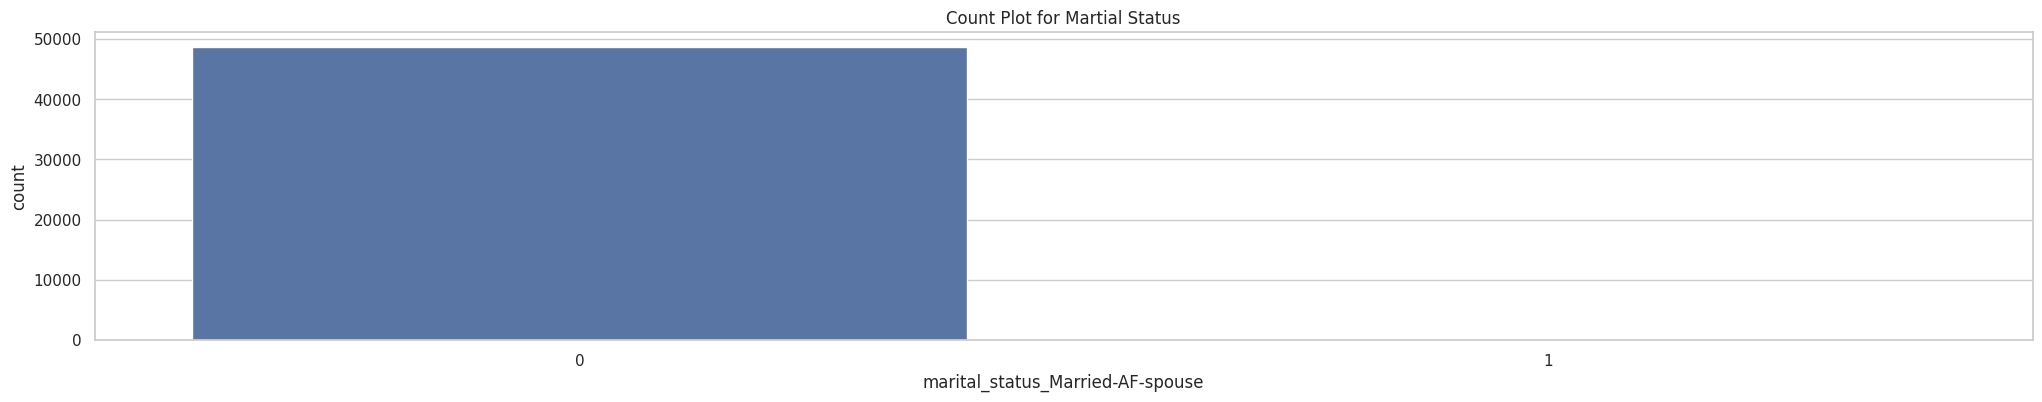

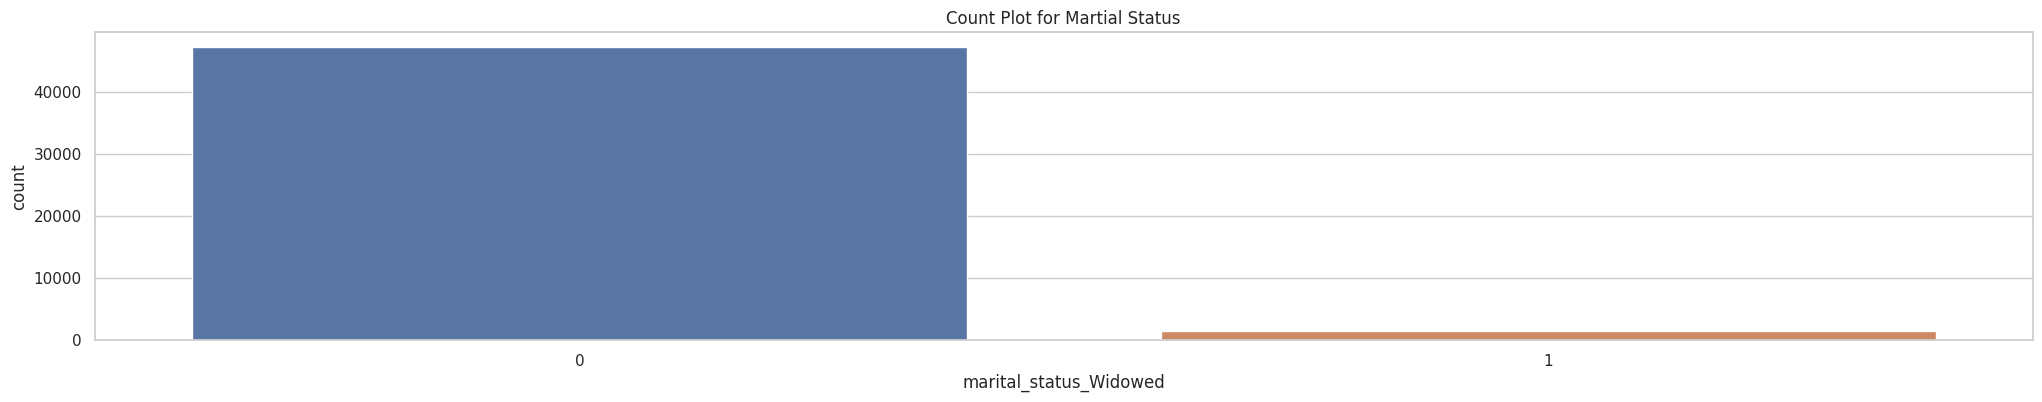

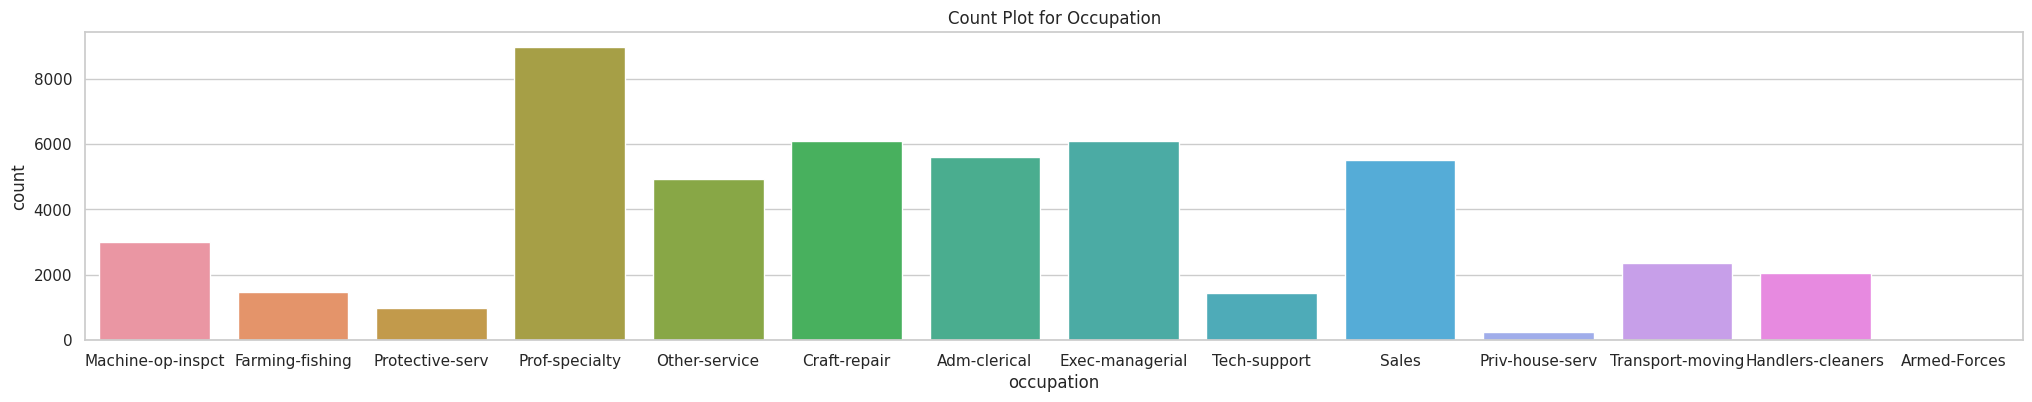

In [ ]:
# Count plot for categorical attibute "education","martial-status" and "occupation" (using seaborn)

# Size of the plot
plt.figure(figsize=(25, 4))

# Plot for "education" attribute
sns.countplot(x="education", data=dataframe)
plt.title("Count Plot for Education")
plt.show()

plt.figure(figsize=(25, 4))

# Plot for "martial-status" attribute
sns.countplot(x="marital_status_Married-AF-spouse", data=dataframe)
plt.title("Count Plot for Martial Status")
plt.show()
plt.figure(figsize=(25, 4))

# Plot for "martial-status" attribute
sns.countplot(x= "marital_status_Widowed", data=dataframe)
plt.title("Count Plot for Martial Status")
plt.show()

plt.figure(figsize=(25, 4))
# Plot for "occupation" attribute
sns.countplot(x="occupation", data=dataframe)
plt.title("Count Plot for Occupation")
plt.show()

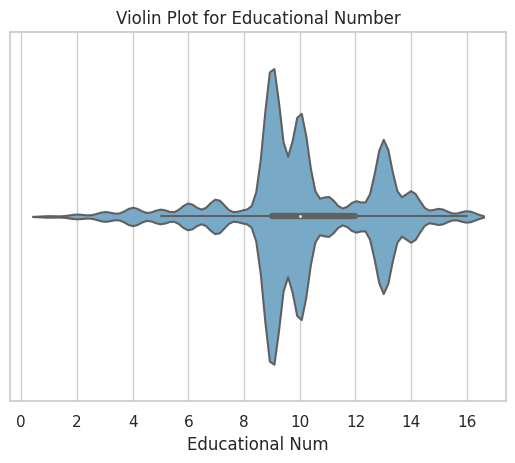

In [ ]:
# Draw violin plot for "educational-num" feature

sns.set(style = 'whitegrid')

sns.violinplot(x="educational-num", data=dataframe,style ="event", palette="Blues")

plt.title("Violin Plot for Educational Number")
plt.xlabel("Educational Num")
plt.show()

2.Bivariate analysis

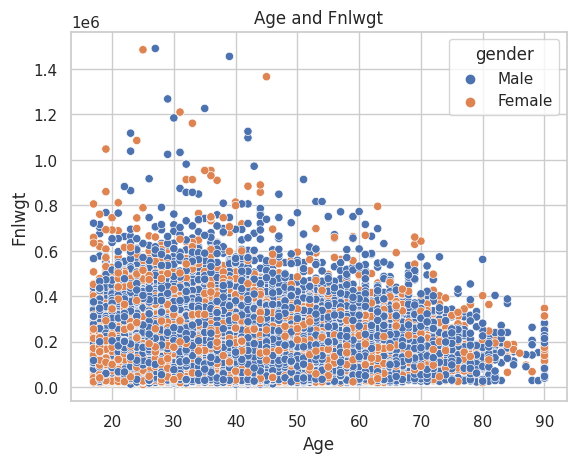

In [ ]:
# Draw Seaborn scatter plot of "age" and "fnlwgt" features (colored according to classes (hint:hue))

# We can use any column with hue. I used gender.
# Bivariate analysis using the hue parameter refers to the technique of visualizing the relationship between two variables while also encoding a third categorical variable using color.
# Create the scatter plot
sns.scatterplot( x="age", y="fnlwgt", data=dataframe,hue='gender')

plt.title("Age and Fnlwgt")
plt.xlabel("Age")
plt.ylabel("Fnlwgt")
plt.show()

3.Multivariate analysis

<ipython-input-67-73d8de84f0a6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


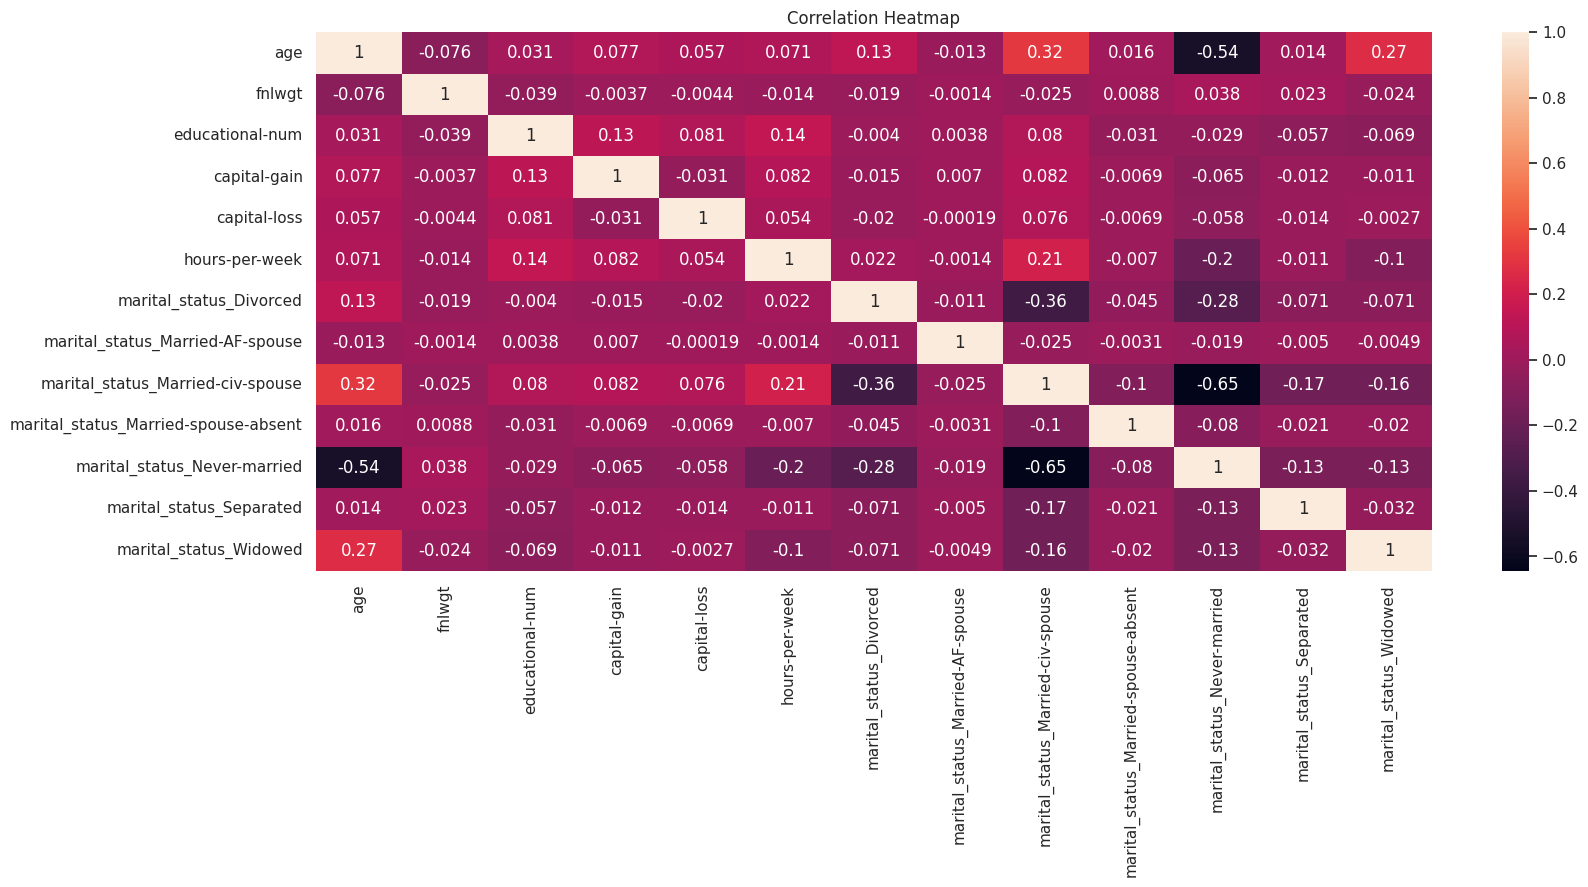

In [ ]:
# Calculate correlation of features and show using heatmap of Seaborn.

# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(18,7))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

 Try to interpret plot

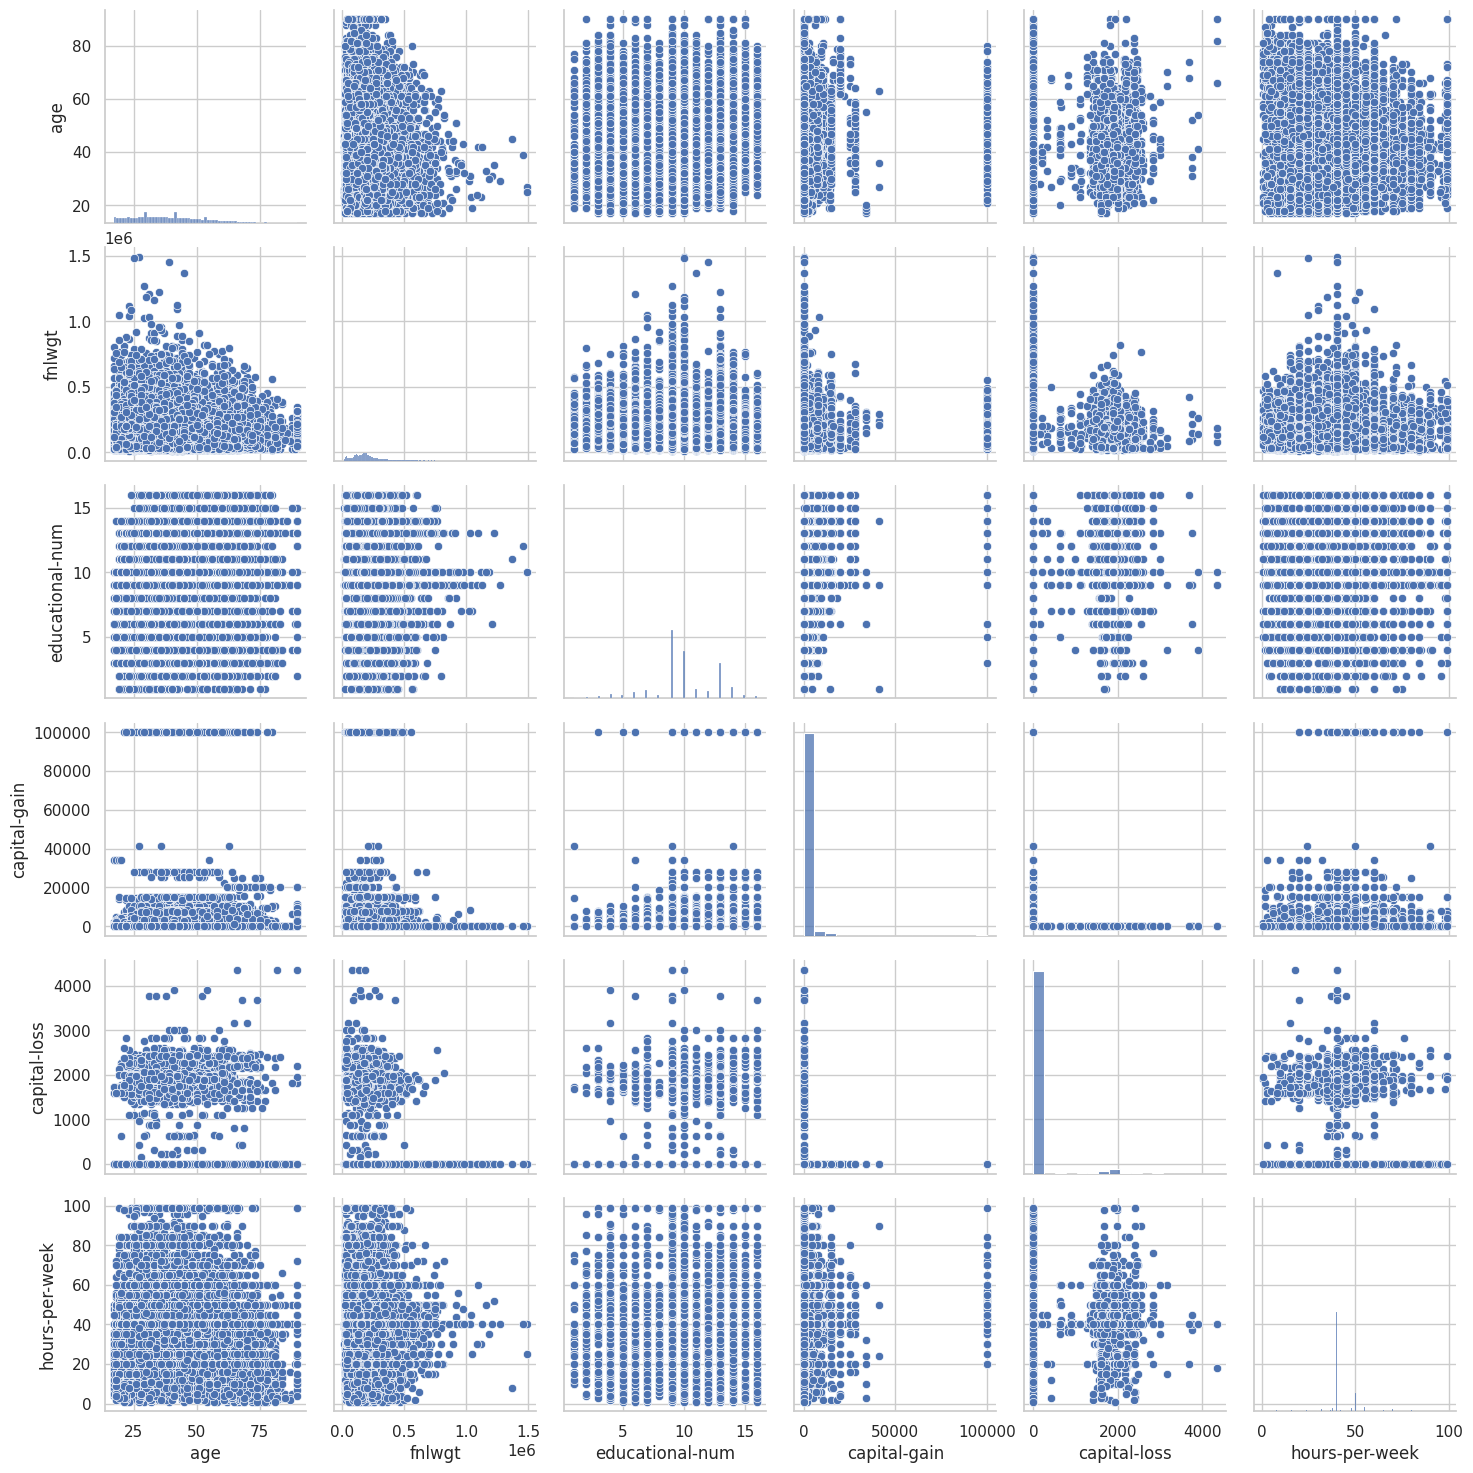

In [ ]:
# Draw seaborn pair plot demonstrating class info.


sns.pairplot(dataframe)
plt.show()

 Try to interpret plot

##### Question: Which plots are suitable for categorical data? Which for numerical?

**For Categorical Data:** Count Plot ("education", "marital-status", "occupation" ...)

**For Numeric Data:** Histogram, PDF, CDF, Violin Plot, Scatter Plot, Correlation Heatmap ("age", "educational-num", "fnlwgt", "capital-gain",  "capital-loss",  "hours-per-week" ...)



Note: Homeworks must be named as "YourStudentId_hw1_Ceng313_23Fall".*

Similarity between assignments will be checked. Assignments should be done individually. Internet resources can be used, but this will increase the similarity between the assignments as others will also benefit from them.

Cells with errors in the notebook will be graded as 0.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf /content/201180025_hw1_Ceng313_23Fall.ipynb

[NbConvertApp] WARNING | pattern '/content/201180025_hw1_Ceng313_23Fall.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ